In [11]:
import numpy as np
import matplotlib.pyplot as plt

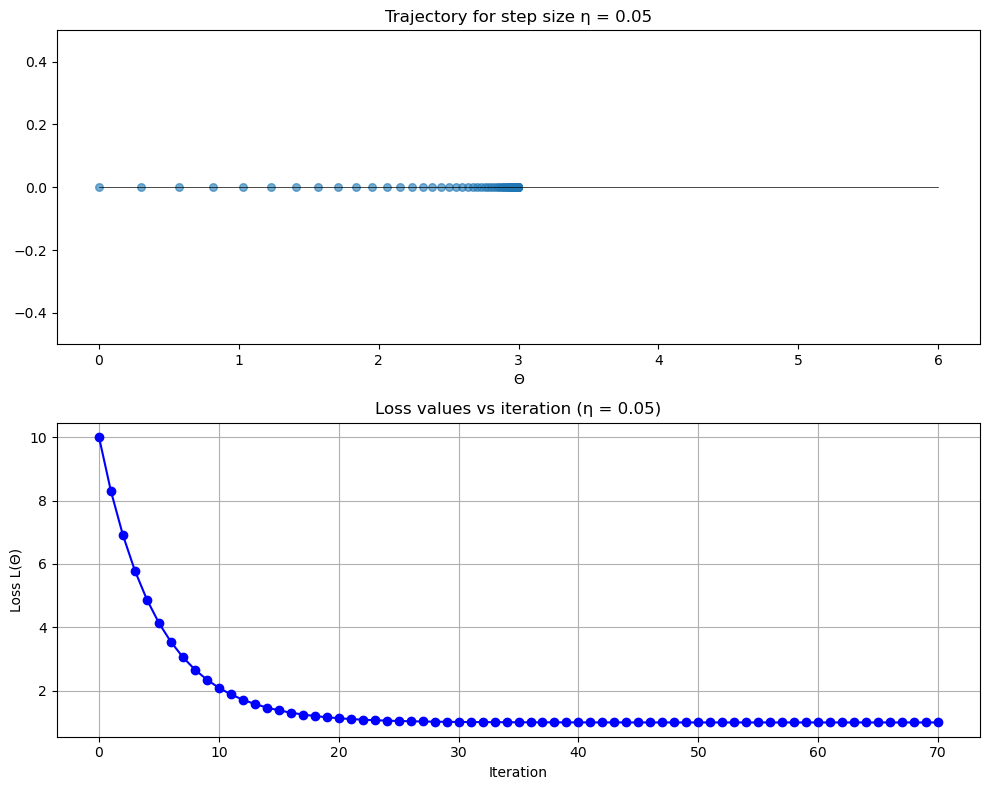

Step size η = 0.05: Final Θ = 2.997911, Final Loss = 1.000004, Iterations = 70



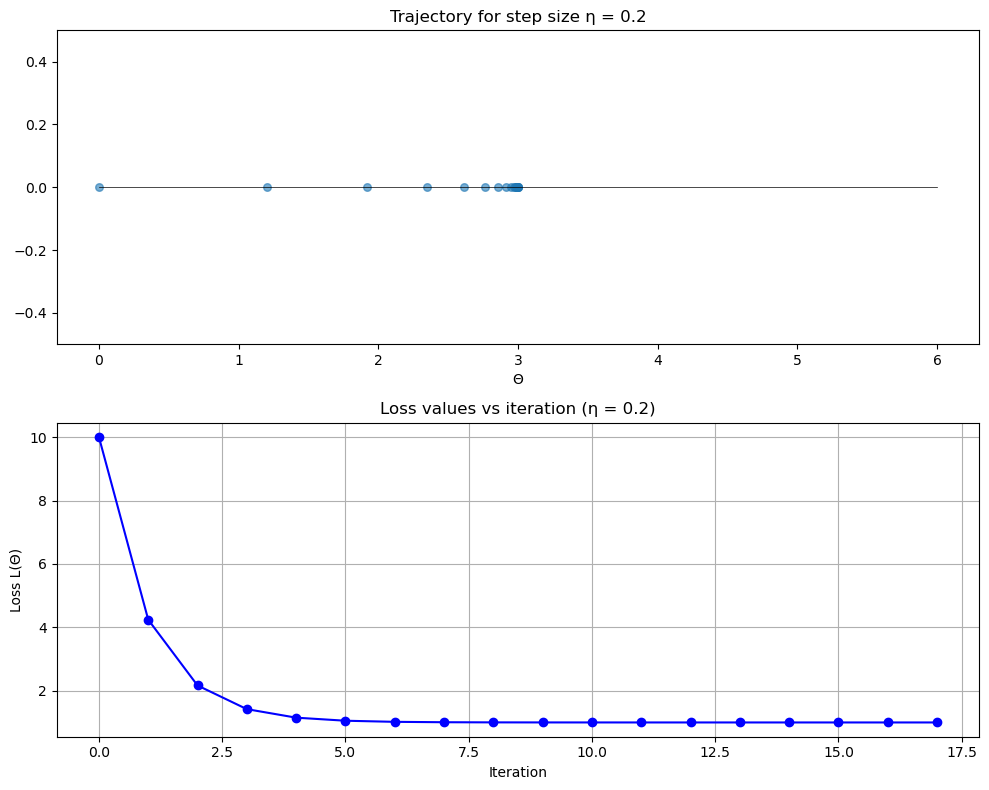

Step size η = 0.2: Final Θ = 2.999154, Final Loss = 1.000001, Iterations = 17



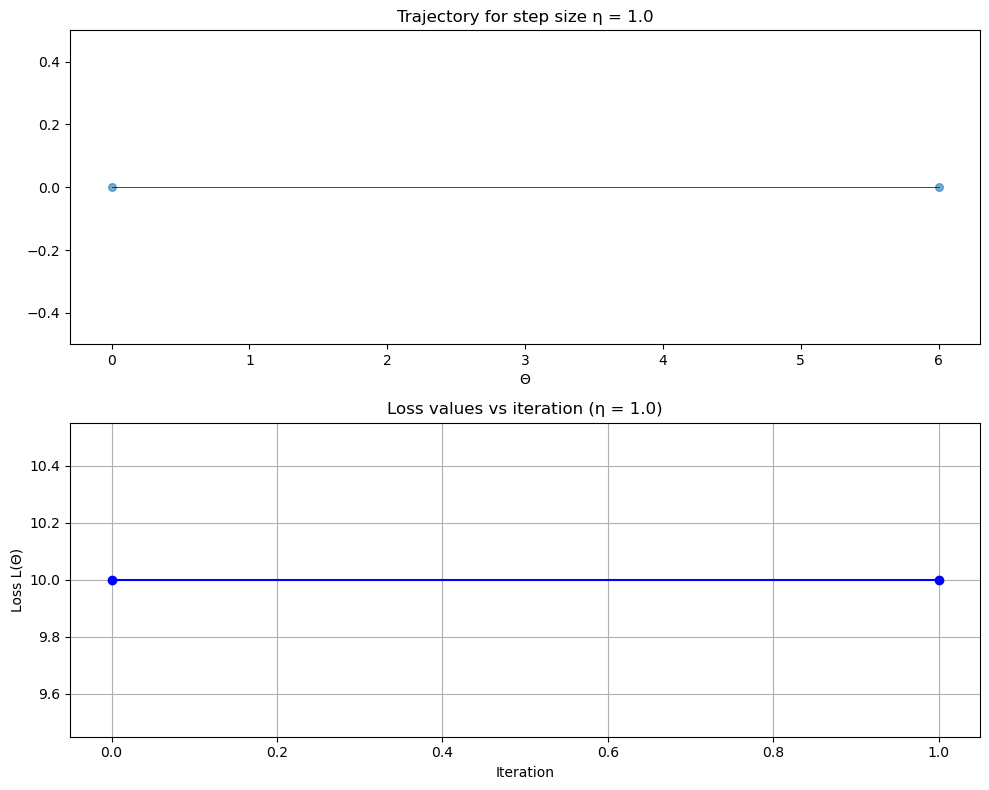

Step size η = 1.0: Final Θ = 0.000000, Final Loss = 10.000000, Iterations = 1



In [12]:
f = lambda x: (x - 3) ** 2 + 1
# 1. Compute the gradient of f
grad_f = lambda x: 2*x - 6
step_sizes = [0.05, 0.2, 1.0]
x0 = 0
tol = 1e-6
max_iter = 1000

for step_size in step_sizes:
    trajectory = [x0]
    loss_values = [f(x0)]
    
    x = x0
    for iteration in range(100):
        x_new = x - step_size * grad_f(x)
        trajectory.append(x_new)
        loss_values.append(f(x_new))
        
        if np.linalg.norm(x_new - x) < 1e-6 or abs(f(x_new) - f(x)) < tol or np.linalg.norm(grad_f(x_new)) < tol:
            break
        x = x_new
    
    # Plot trajectory on real line
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    
    axes[0].set_title(f'Trajectory for step size η = {step_size}')
    axes[0].plot([0, 6], [0, 0], 'k-', linewidth=0.5)
    axes[0].scatter(trajectory, [0]*len(trajectory), alpha=0.6, s=30)
    axes[0].set_xlabel('Θ')
    axes[0].set_ylim(-0.5, 0.5)
    
    # Plot loss values vs iteration
    axes[1].plot(loss_values, 'b-o')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Loss L(Θ)')
    axes[1].set_title(f'Loss values vs iteration (η = {step_size})')
    axes[1].grid()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Step size η = {step_size}: Final Θ = {x:.6f}, Final Loss = {f(x):.6f}, Iterations = {len(trajectory)-1}\n")



In [13]:
def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    """
    Return a step size eta that satisfies the Armijo condition:
        L(theta - eta*g) <= L(theta) - c * eta * ||g||^2
    Inputs:
      - L:      R^n -> R
      - grad_L: R^n -> R^d
      - theta:  current point (np.ndarray)
      - eta0:   initial step size
      - beta:   shrinking factor in (0,1)
      - c:      Armijo constant in (0,1)
    """
    eta = eta0
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:
        eta *= beta
    return eta

In [14]:
def gradient_descent_with_backtracking(L, grad_L, theta0, eta0=1.0, beta=0.5, c=1e-4, tol=1e-6, max_iter=1000):
    """
    Perform gradient descent with backtracking line search.
    Inputs:
      - L:      R^n -> R
      - grad_L: R^n -> R^d
      - theta0: initial point (np.ndarray)
      - eta0:   initial step size for backtracking
      - beta:   shrinking factor for backtracking
      - c:      Armijo constant for backtracking
      - tol:    tolerance for stopping criterion
      - max_iter: maximum number of iterations
    Returns:
      - trajectory: list of points visited during optimization
      - loss_values: list of loss values at each point
    """
    theta = theta0
    trajectory = [theta]
    loss_values = [L(theta)]
    
    for iteration in range(max_iter):
        eta = backtracking(L, grad_L, theta, eta0, beta, c)
        theta_new = theta - eta * grad_L(theta)
        
        trajectory.append(theta_new)
        loss_values.append(L(theta_new))
        
        if np.linalg.norm(theta_new - theta) < tol or abs(L(theta_new) - L(theta)) < tol or np.linalg.norm(grad_L(theta_new)) < tol:
            break
        
        theta = theta_new
    
    return trajectory, loss_values

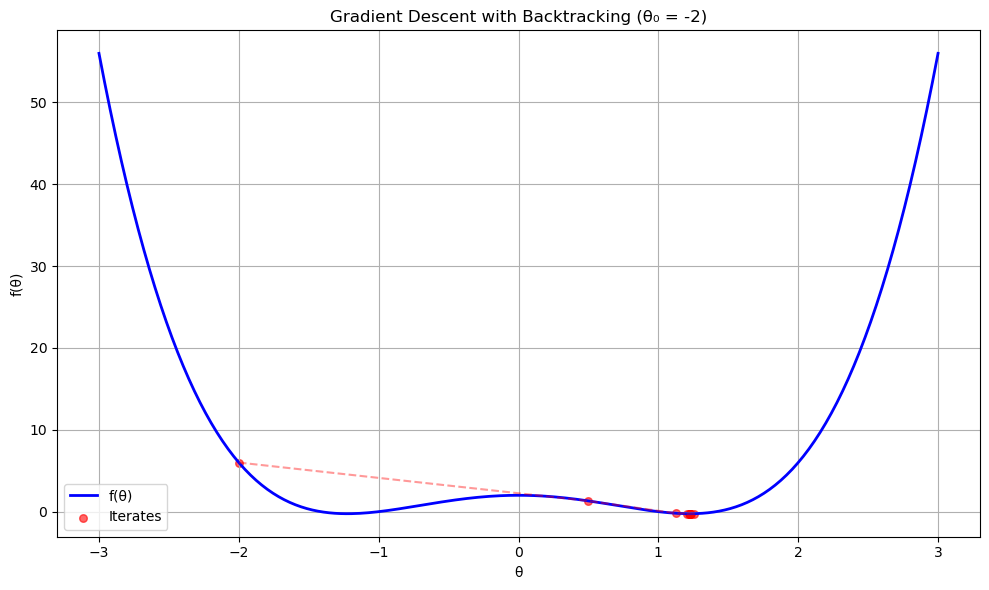

Initial θ₀ = -2: Final θ = 1.224878, Final Loss = -0.250000, Iterations = 11



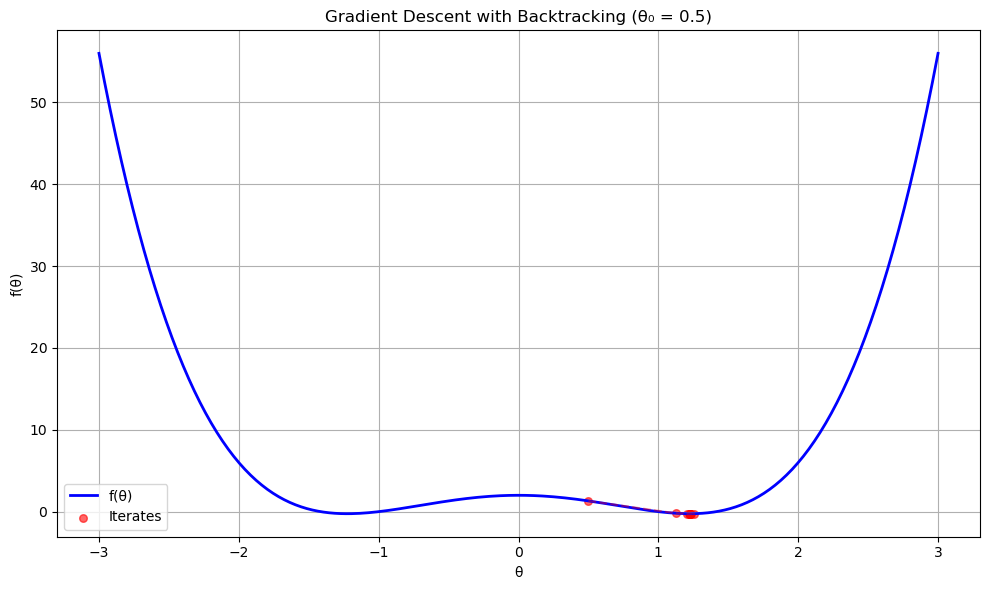

Initial θ₀ = 0.5: Final θ = 1.224878, Final Loss = -0.250000, Iterations = 10



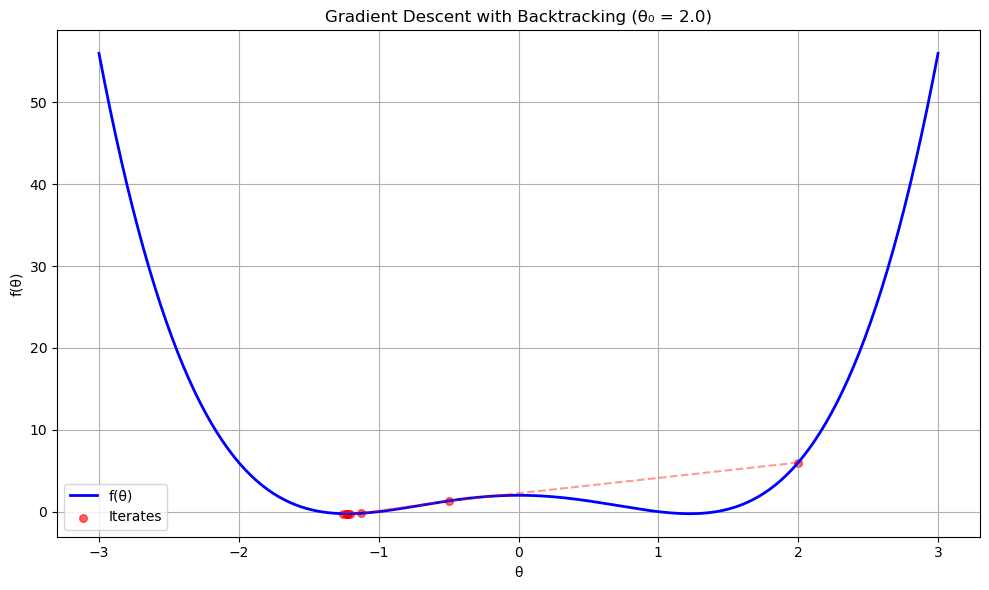

Initial θ₀ = 2.0: Final θ = -1.224878, Final Loss = -0.250000, Iterations = 11



In [15]:
thetaZeros = [-2, 0.5, 2.0]
f = lambda x: x**4 - 3*x**2 + 2
grad_f = lambda x: 4*x**3 - 6*x

for theta0 in thetaZeros:
    theta0_vec = np.array([theta0])
    trajectory, loss_values = gradient_descent_with_backtracking(f, grad_f, theta0)
    
    # Plot trajectory on real line
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    # Plot the function curve
    theta_range = np.linspace(-3, 3, 300)
    ax.plot(theta_range, f(theta_range), 'b-', linewidth=2, label='f(θ)')

    # Plot trajectory
    trajectory_array = np.array(trajectory).flatten()
    ax.scatter(trajectory_array, f(trajectory_array), alpha=0.6, s=30, c='red', label='Iterates')
    ax.plot(trajectory_array, f(trajectory_array), 'r--', alpha=0.4)

    ax.set_xlabel('θ')
    ax.set_ylabel('f(θ)')
    ax.set_title(f'Gradient Descent with Backtracking (θ₀ = {theta0})')
    ax.legend()
    ax.grid()

    plt.tight_layout()
    plt.show()

    print(f"Initial θ₀ = {theta0}: Final θ = {trajectory_array[-1]:.6f}, Final Loss = {loss_values[-1]:.6f}, Iterations = {len(trajectory)-1}\n")

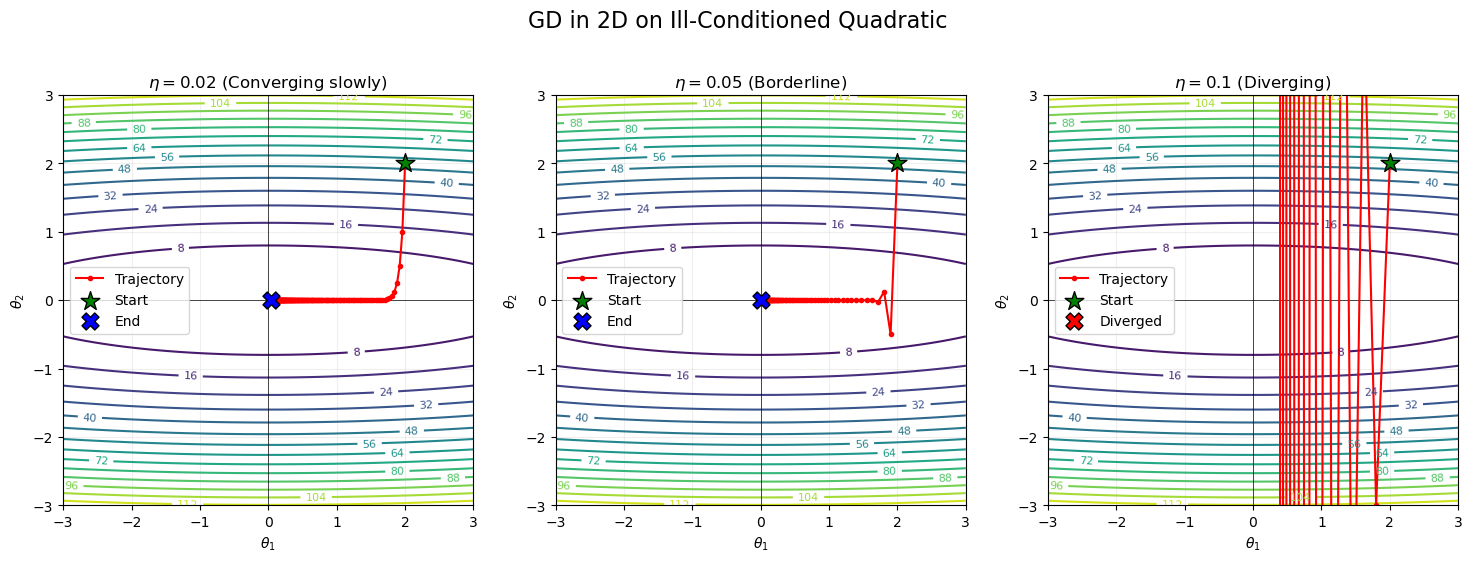

In [49]:
def quad_levelsets(A, xlim=(-3,3), ylim=(-3,3), ngrid=400, ncontours=12, title=None):
    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = 0.5*(A[0,0]*X**2 + 2*A[0,1]*X*Y + A[1,1]*Y**2)
    
    cs = plt.contour(X, Y, Z, levels=ncontours)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.axhline(0, lw=0.5, color='k')
    plt.axvline(0, lw=0.5, color='k')
    plt.gca().set_aspect('equal', 'box')
    if title:
        plt.title(title)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.grid(alpha=0.2)

# Define the quadratic function and gradient
A = np.array([[1.0, 0.0], [0.0, 25.0]])

L_ex3 = lambda theta: 0.5 * theta.T @ A @ theta
grad_L_ex3 = lambda theta: A @ theta

# Gradient Descent in 2D
def gd_2d(grad_L, theta0, eta, max_iter=200):
    """
    Gradient descent in 2D with fixed step size.
    """
    thetas = [theta0.copy()]
    losses = []
    
    theta = theta0.copy()
    for k in range(max_iter):
        losses.append(L_ex3(theta))
        grad = grad_L(theta)
        theta = theta - eta * grad
        thetas.append(theta.copy())
        
        # Check for divergence
        if np.linalg.norm(theta) > 1e3:
            break
    
    losses.append(L_ex3(theta))
    return np.array(thetas), np.array(losses)

theta0 = np.array([2.0, 2.0])
step_sizes = [0.02, 0.05, 0.1]
labels = ['Converging slowly', 'Borderline', 'Diverging']

fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
fig.suptitle('GD in 2D on Ill-Conditioned Quadratic', fontsize=16)

for idx, (eta, label) in enumerate(zip(step_sizes, labels)):
    thetas, losses = gd_2d(grad_L_ex3, theta0, eta, max_iter=200)
    
    # Plot trajectory on level sets
    ax1 = axes[idx]
    plt.sca(ax1)
    quad_levelsets(A, xlim=(-3, 3), ylim=(-3, 3), ncontours=15, 
                   title=f'$\\eta = {eta}$ ({label})')
    
    # Plot trajectory
    theta1s = thetas[:, 0]
    theta2s = thetas[:, 1]
    
    ax1.plot(theta1s, theta2s, 'r-o', markersize=3, linewidth=1.5, label='Trajectory')
    ax1.scatter(theta1s[0], theta2s[0], color='green', s=200, marker='*', 
               edgecolors='black', zorder=5, label='Start')
    
    if len(thetas) < 201:  # If didn't complete all iterations (diverged)
        ax1.scatter(theta1s[-1], theta2s[-1], color='red', s=150, marker='X', 
                   edgecolors='black', zorder=5, label='Diverged')
    else:
        ax1.scatter(theta1s[-1], theta2s[-1], color='blue', s=150, marker='X', 
                   edgecolors='black', zorder=5, label='End')
    
    ax1.legend()
    ax1.set_xlim([-3, 3])
    ax1.set_ylim([-3, 3])

plt.show()

In [39]:
def gradient_descent_exact_line_search(L, grad_L, theta0, tol=1e-6, max_iter=1000):
    """
    Gradient descent with exact line search in 2D.
    Inputs:
      - L:      R^n -> R
      - grad_L: R^n -> R^d
      - theta0: initial point (np.ndarray)
      - tol:    tolerance for stopping criterion
      - max_iter: maximum number of iterations
    Returns:
      - trajectory: list of points visited during optimization
      - loss_values: list of loss values at each point
    """
    theta = theta0
    trajectory = [theta]
    loss_values = [L(theta)]
    
    for iteration in range(max_iter):
        g = A @ theta
        Ag = A @ g
        eta = np.dot(g, g) / np.dot(g, Ag)
        
        theta_new = theta - eta * g
        
        trajectory.append(theta_new)
        loss_values.append(L(theta_new))
        
        if np.linalg.norm(theta_new - theta) < tol or abs(L(theta_new) - L(theta)) < tol or np.linalg.norm(grad_L(theta_new)) < tol:
            break
        
        theta = theta_new
    
    return trajectory, loss_values

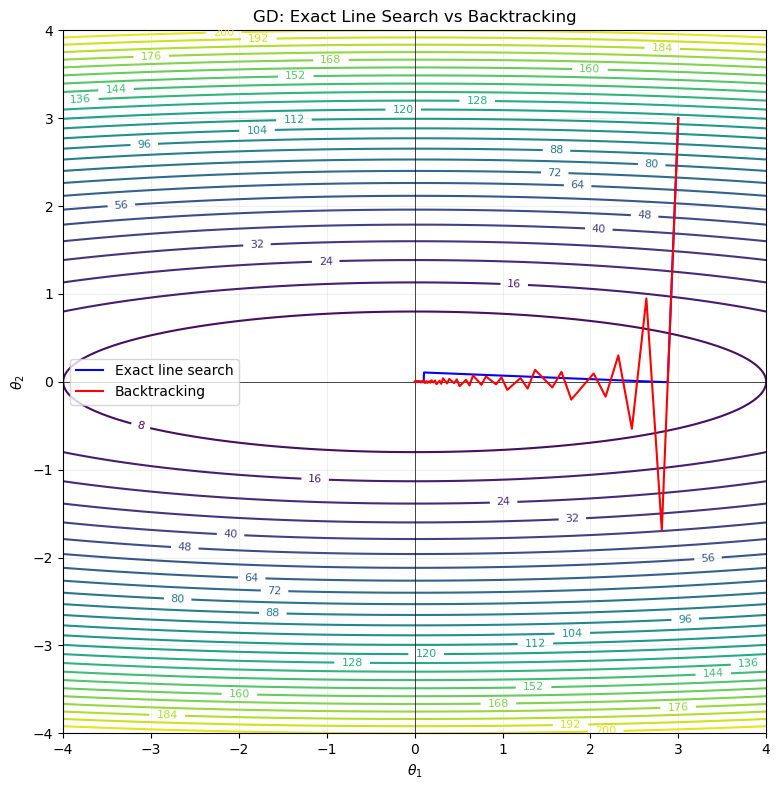

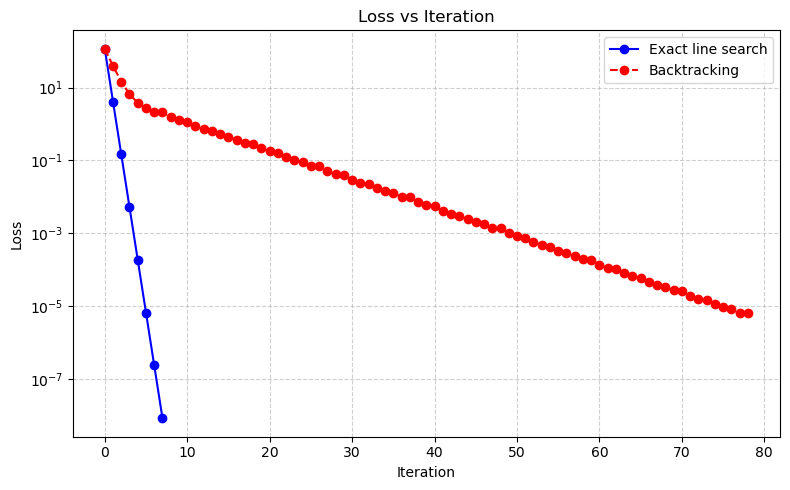

In [46]:
theta0 = np.array([3,3]).T
traj_exact, loss_exact = gradient_descent_exact_line_search(L_ex3, grad_L_ex3, theta0, tol=1e-6, max_iter=200)
traj_bt, loss_bt = gradient_descent_with_backtracking(L_ex3, grad_L_ex3, theta0, eta0=1.0, beta=0.5, c=1e-4, tol=1e-6, max_iter=200)

traj_exact = np.array(traj_exact)
traj_bt = np.array(traj_bt)

plt.figure(figsize=(8,8))
quad_levelsets(A, xlim=(-4,4), ylim=(-4,4), ncontours=25, title='GD: Exact Line Search vs Backtracking')

plt.plot(traj_exact[:,0], traj_exact[:,1], 'b-', markersize=4, linewidth=1.5, label='Exact line search')
plt.plot(traj_bt[:,0], traj_bt[:,1], 'r-', markersize=4, linewidth=1.5, label='Backtracking')

plt.legend()
plt.xlim(-4,4); plt.ylim(-4,4)
plt.gca().set_aspect('equal', 'box')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.semilogy(np.arange(len(loss_exact)), np.array(loss_exact), 'b-o', label='Exact line search')
plt.semilogy(np.arange(len(loss_bt)), np.array(loss_bt), 'r--o', label='Backtracking')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

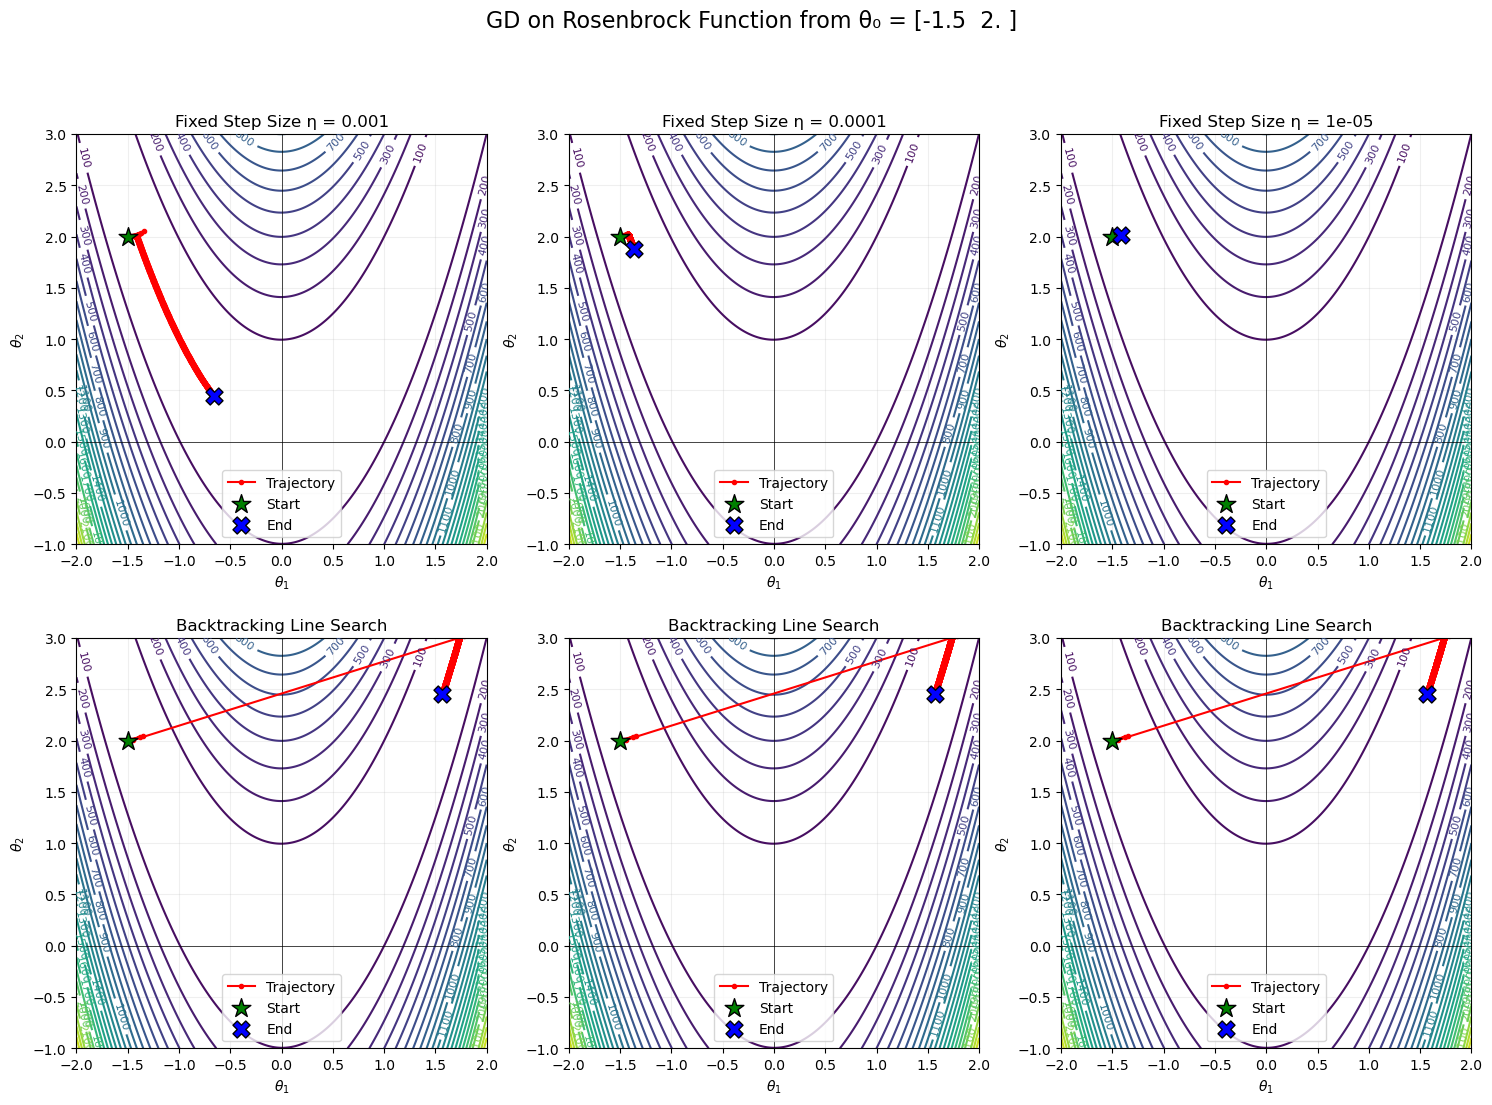

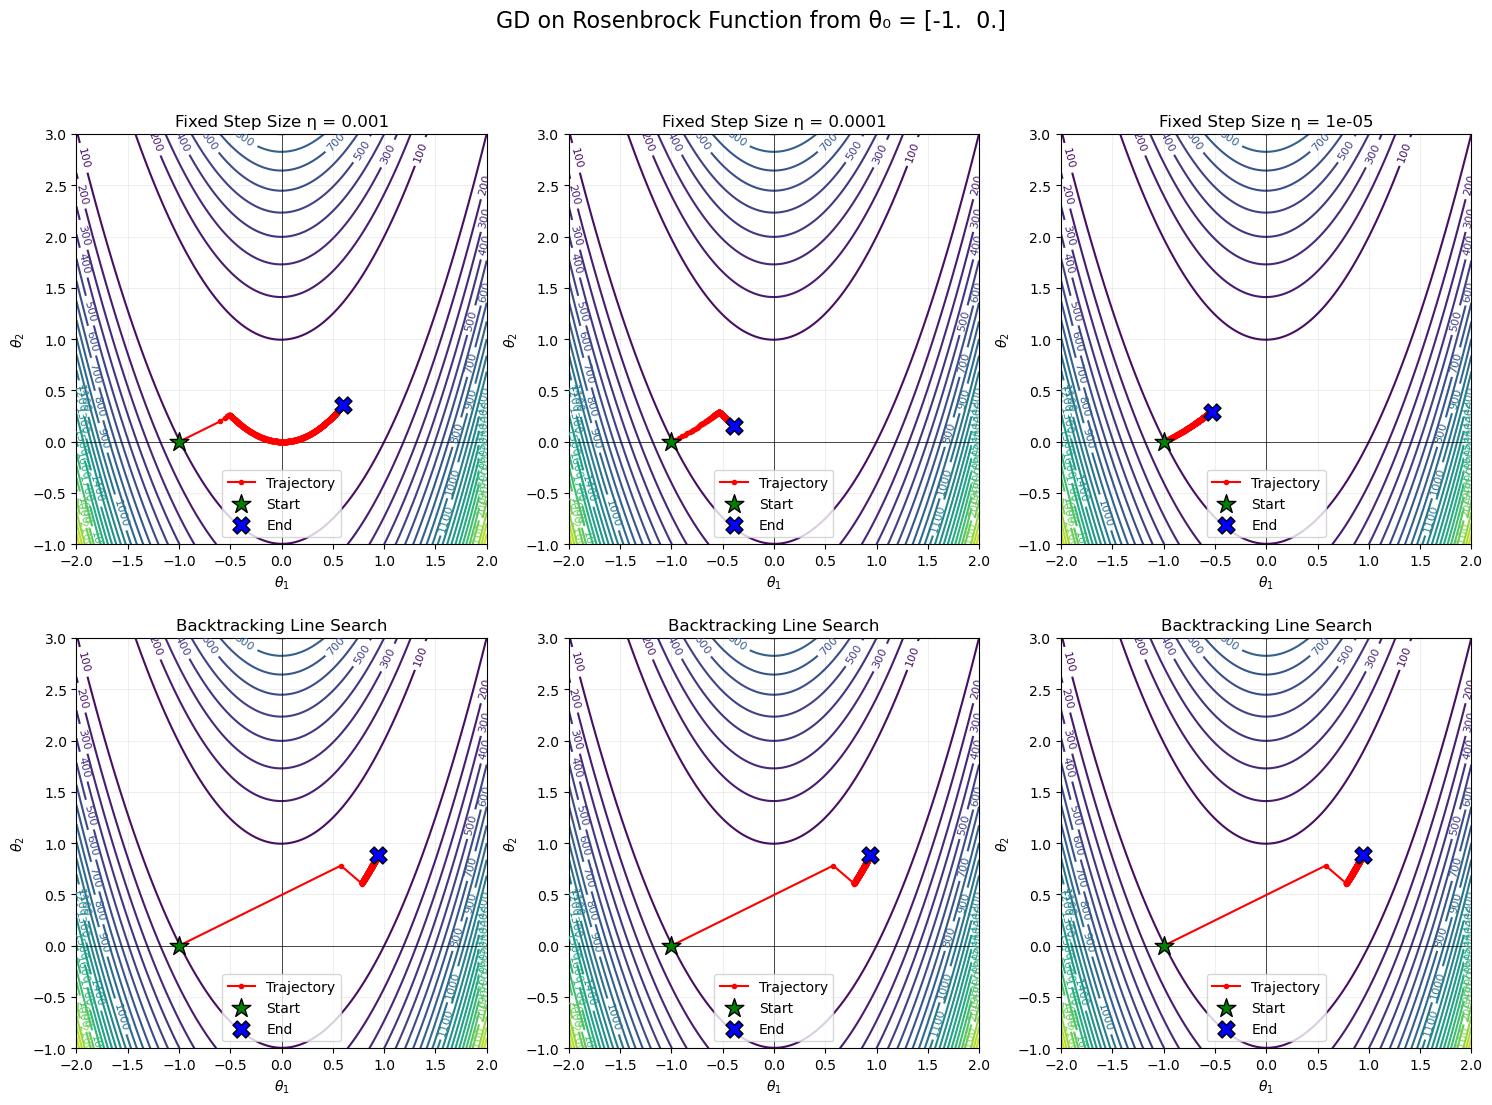

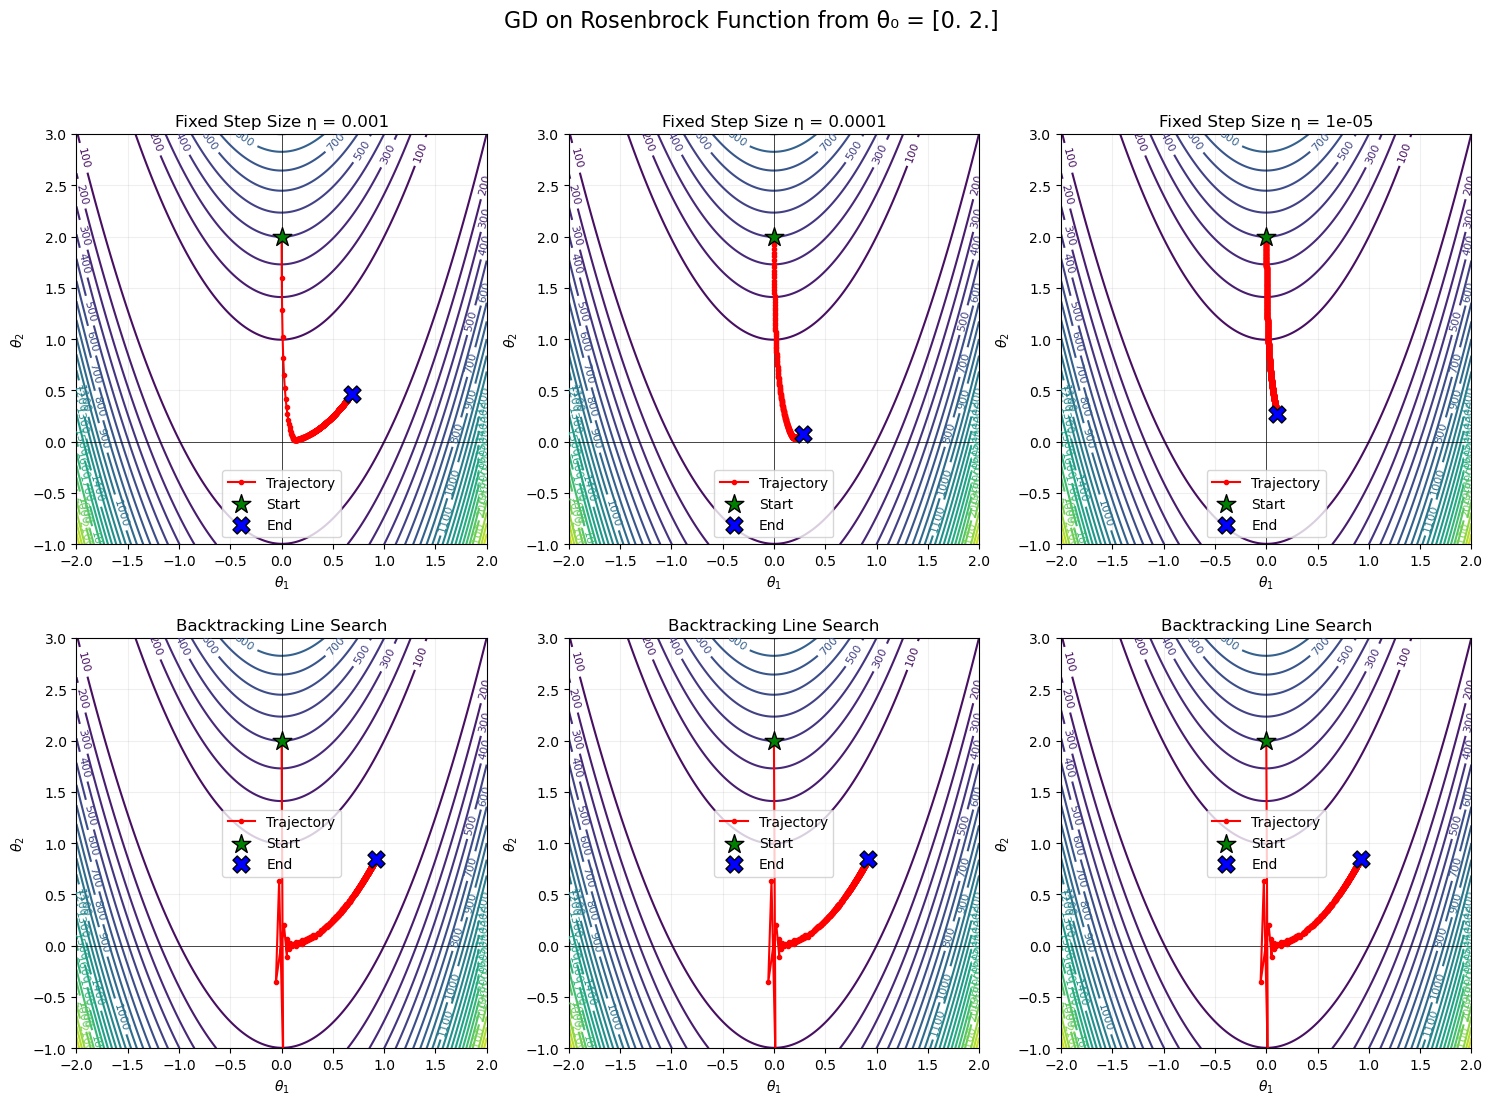

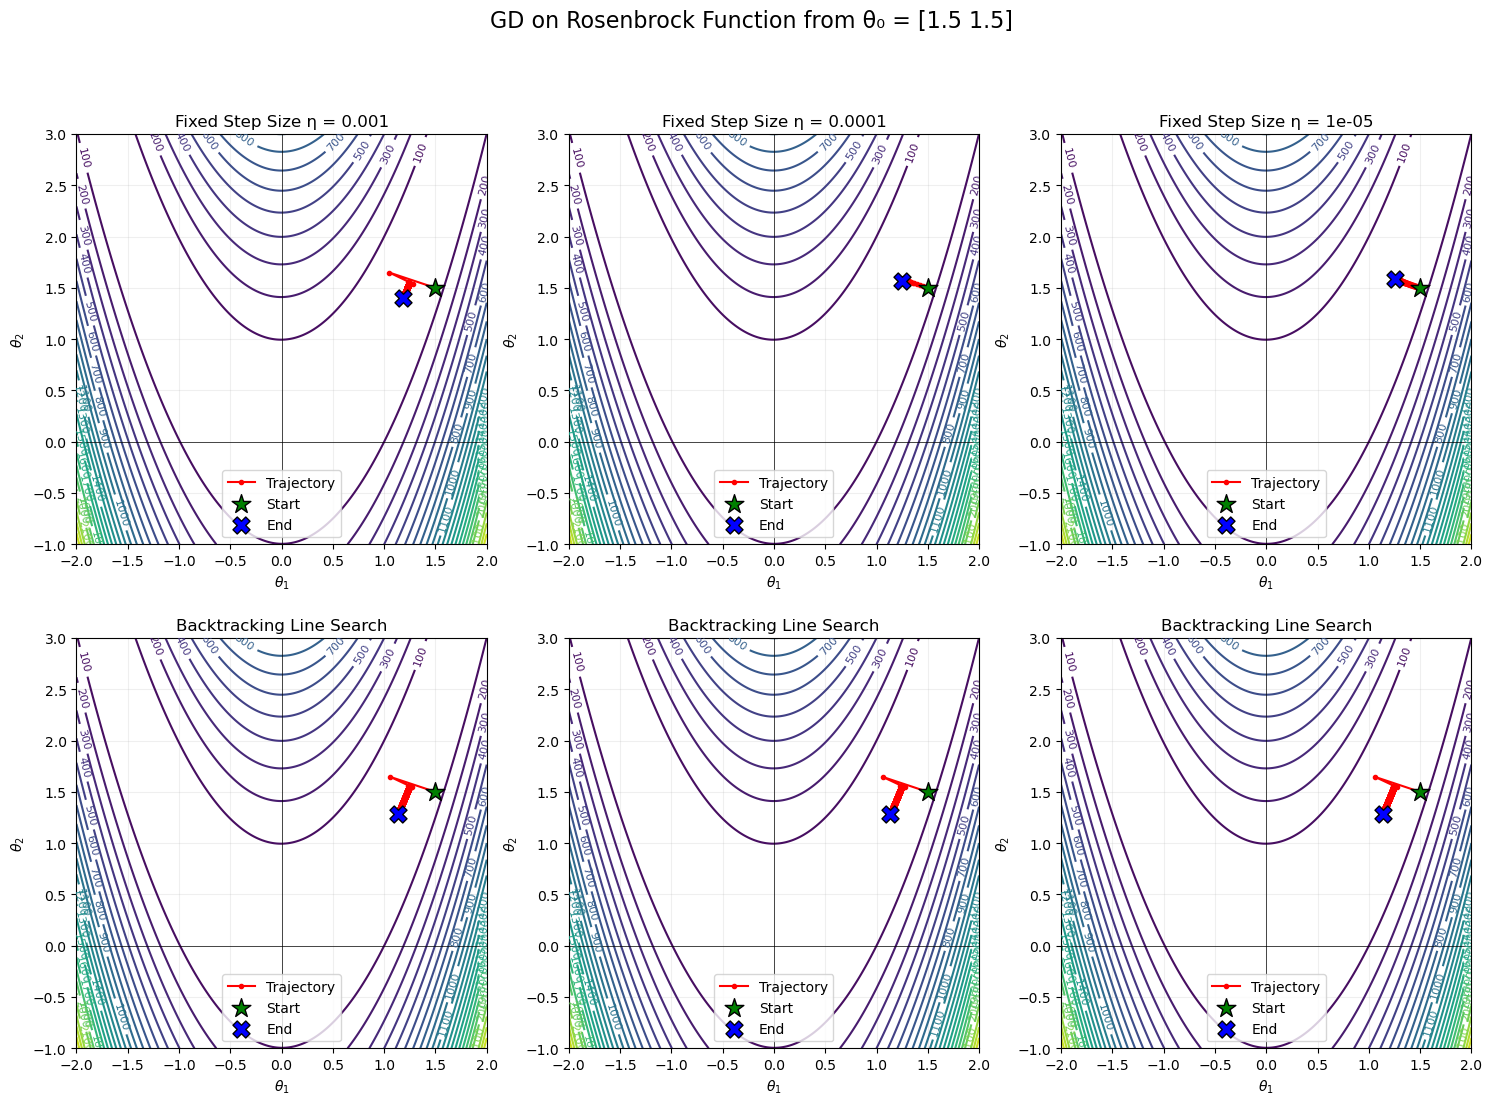

In [59]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

rosenbrock = lambda theta: (1 - theta[0])**2 + 100 * (theta[1] - theta[0]**2)**2
grad_rosenbrock = lambda theta: np.array([
    -2*(1 - theta[0]) - 400*theta[0]*(theta[1] - theta[0]**2),
    200*(theta[1] - theta[0]**2)
]) 

def rosenbrock_levelsets(xlim=(-2,2), ylim=(-1,3), ngrid=400, ncontours=20, title=None):
    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = (1 - X)**2 + 100 * (Y - X**2)**2
    
    cs = plt.contour(X, Y, Z, levels=ncontours)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.axhline(0, lw=0.5, color='k')
    plt.axvline(0, lw=0.5, color='k')
    plt.gca().set_aspect('equal', 'box')
    if title:
        plt.title(title)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.grid(alpha=0.2)

def gd_rosenbrock(grad_L, theta0, eta, max_iter=1000):
    """
    Gradient descent on Rosenbrock function with fixed step size.
    """
    thetas = [theta0.copy()]
    losses = []
    
    theta = theta0.copy()
    for k in range(max_iter):
        losses.append(rosenbrock(theta))
        grad = grad_L(theta)
        theta = theta - eta * grad
        thetas.append(theta.copy())
        
        # Check for divergence
        if np.linalg.norm(theta) > 1e6:
            break
    
    losses.append(rosenbrock(theta))
    return np.array(thetas), np.array(losses)

def gd_rosenbrock_backtracking(grad_L, theta0, eta0=1.0, beta=0.5, c=1e-4, tol=1e-6, max_iter=1000):
    """
    Gradient descent on Rosenbrock function with backtracking line search.
    """
    thetas = [theta0.copy()]
    losses = []
    
    theta = theta0.copy()
    for k in range(max_iter):
        losses.append(rosenbrock(theta))
        eta = backtracking(rosenbrock, grad_L, theta, eta0, beta, c)
        grad = grad_L(theta)
        theta = theta - eta * grad
        thetas.append(theta.copy())
        
        # Check for divergence
        if np.linalg.norm(theta) > 1e6:
            break
    
    losses.append(rosenbrock(theta))
    return np.array(thetas), np.array(losses)

step_sizes = [10**-3, 10**-4, 10**-5]
thetaZeros = [np.array([-1.5, 2.0]), np.array([-1.0, 0.0]), np.array([0.0, 2.0]), np.array([1.5, 1.5])]

for theta0 in thetaZeros:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'GD on Rosenbrock Function from θ₀ = {theta0}', fontsize=16)
    
    for idx, eta in enumerate(step_sizes):
        thetas_fixed, losses_fixed = gd_rosenbrock(grad_rosenbrock, theta0, eta, max_iter=1000)
        thetas_bt, losses_bt = gd_rosenbrock_backtracking(grad_rosenbrock, theta0, eta0=1.0, beta=0.5, c=1e-4, tol=1e-6, max_iter=1000)
        
        # Plot trajectory on level sets for fixed step size
        ax1 = axes[0, idx]
        plt.sca(ax1)
        rosenbrock_levelsets(xlim=(-2,2), ylim=(-1,3), ncontours=25, 
                             title=f'Fixed Step Size η = {eta}')
        
        theta1s_fixed = thetas_fixed[:, 0]
        theta2s_fixed = thetas_fixed[:, 1]
        
        ax1.plot(theta1s_fixed, theta2s_fixed, 'r-o', markersize=3, linewidth=1.5, label='Trajectory')
        ax1.scatter(theta1s_fixed[0], theta2s_fixed[0], color='green', s=200, marker='*', 
                   edgecolors='black', zorder=5, label='Start')
        ax1.scatter(theta1s_fixed[-1], theta2s_fixed[-1], color='blue', s=150, marker='X', 
                   edgecolors='black', zorder=5, label='End')
        ax1.legend()
        ax1.set_xlim([-2, 2])
        ax1.set_ylim([-1, 3])
        
        # Plot trajectory on level sets for backtracking
        ax2 = axes[1, idx]
        plt.sca(ax2)
        rosenbrock_levelsets(xlim=(-2,2), ylim=(-1,3), ncontours=25, 
                             title=f'Backtracking Line Search')
        
        theta1s_bt = thetas_bt[:, 0]
        theta2s_bt = thetas_bt[:, 1]
        
        ax2.plot(theta1s_bt, theta2s_bt, 'r-o', markersize=3, linewidth=1.5, label='Trajectory')
        ax2.scatter(theta1s_bt[0], theta2s_bt[0], color='green', s=200, marker='*', 
                   edgecolors='black', zorder=5, label='Start')
        
        ax2.scatter(theta1s_bt[-1], theta2s_bt[-1], color='blue', s=150, marker='X',
                    edgecolors='black', zorder=5, label='End')
        ax2.legend()
        ax2.set_xlim([-2, 2])
        ax2.set_ylim([-1, 3])



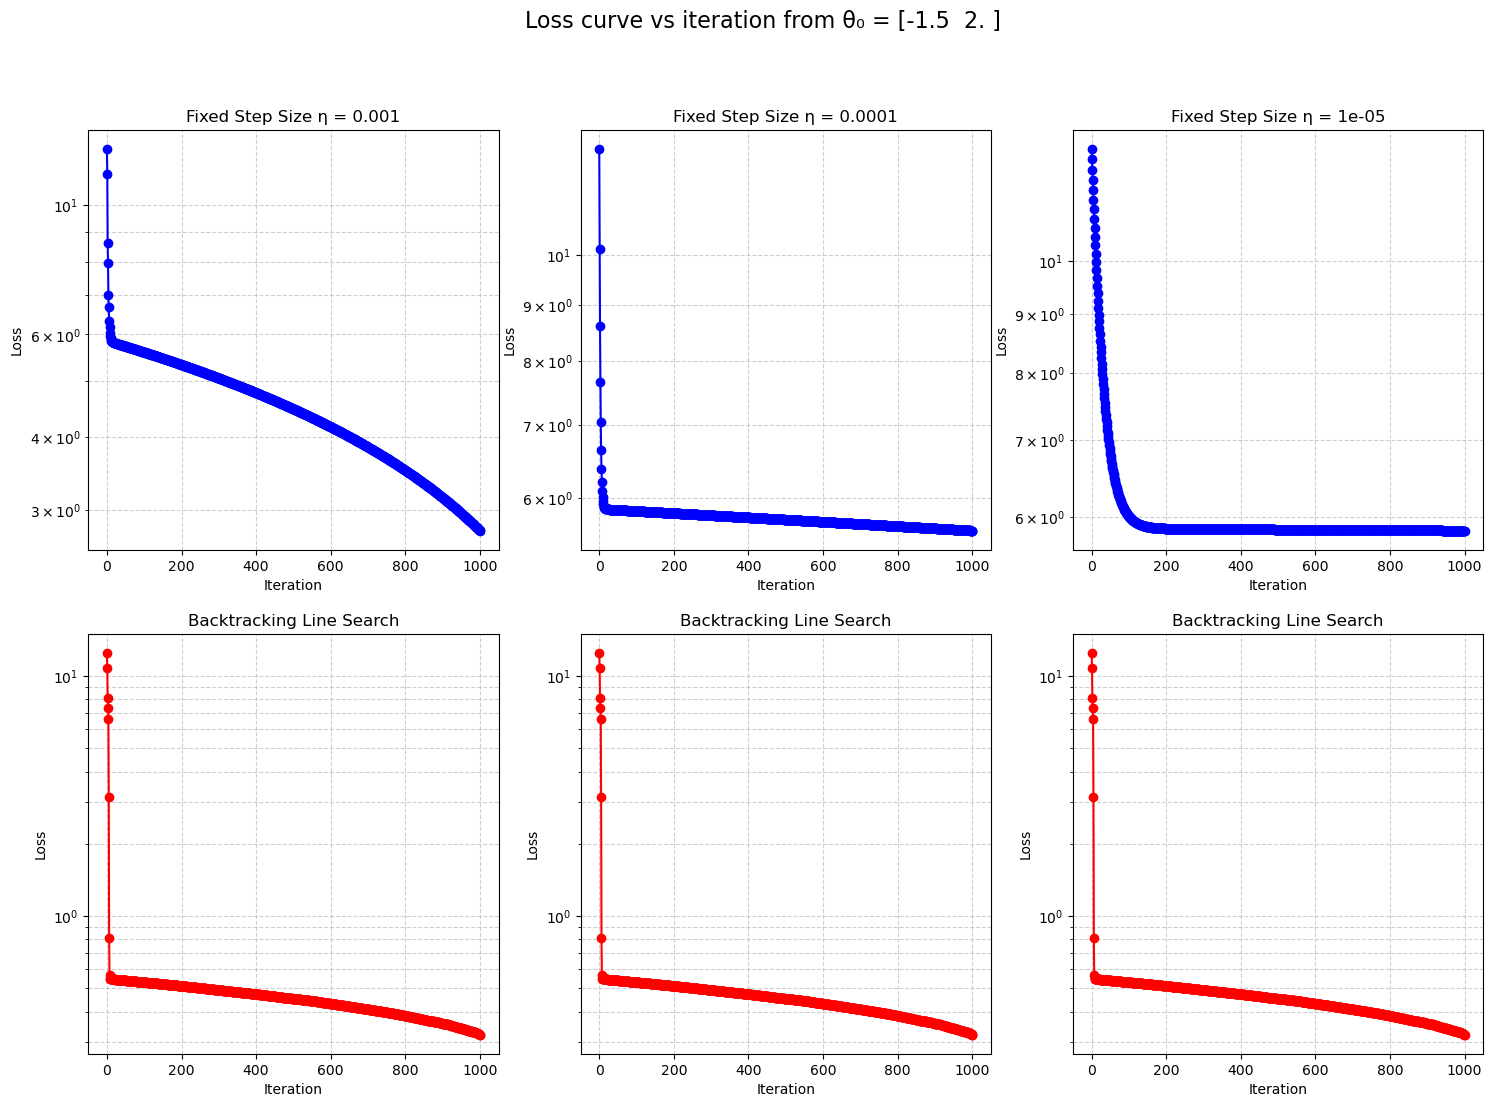

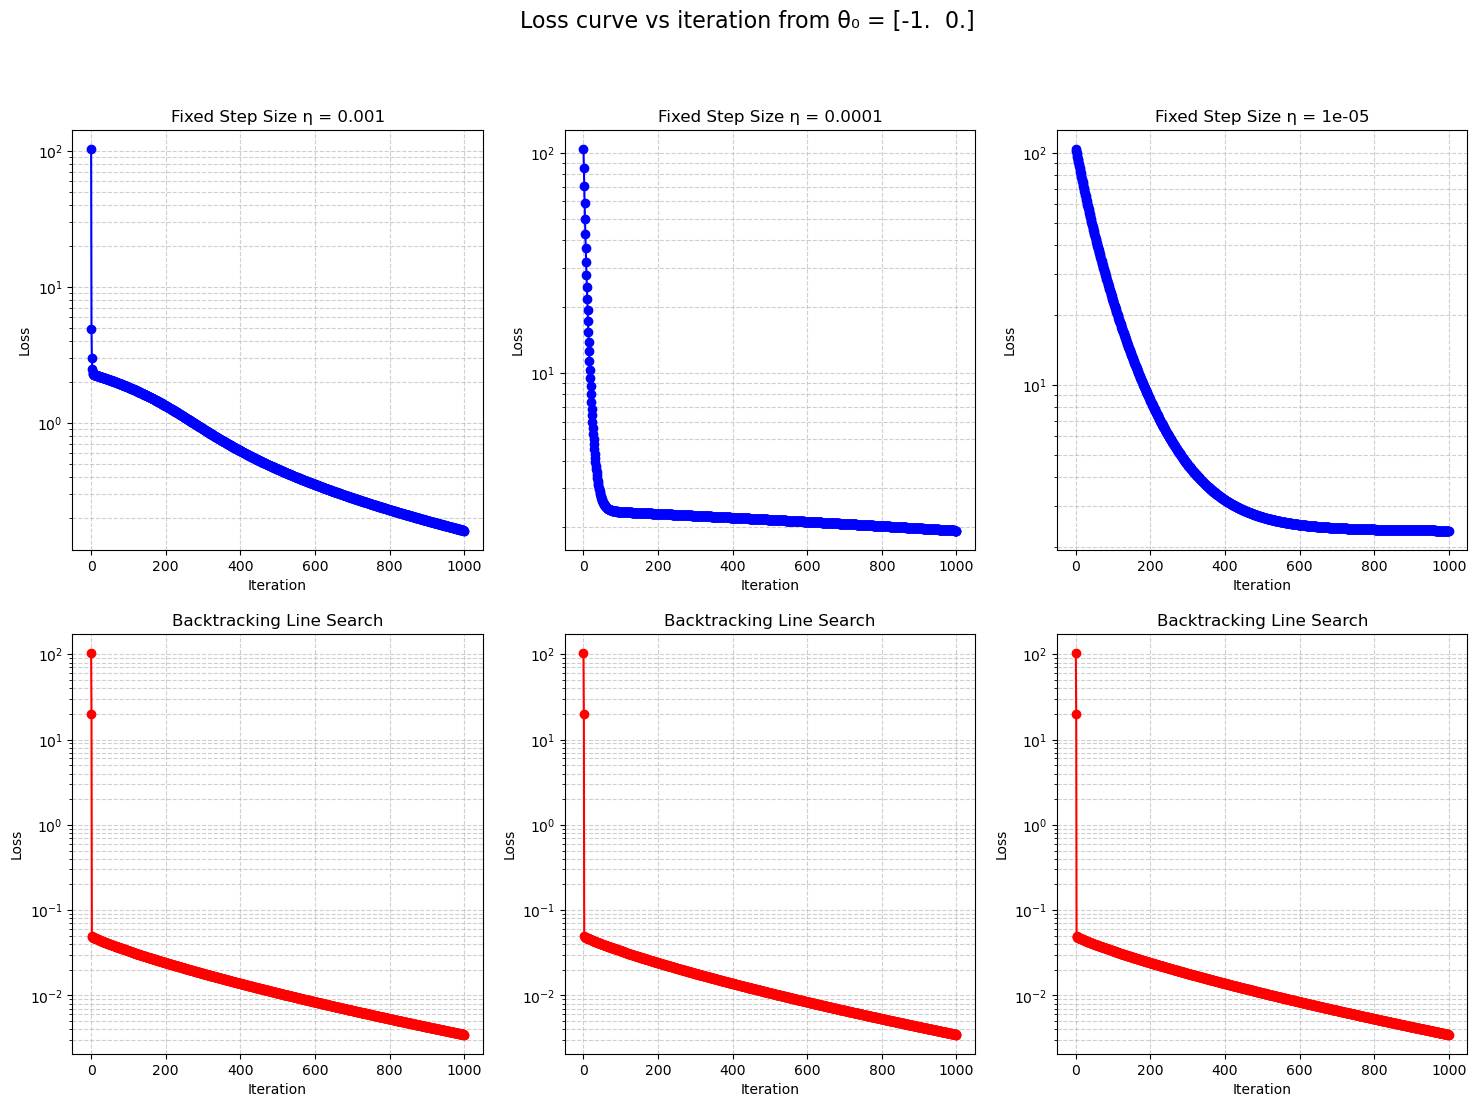

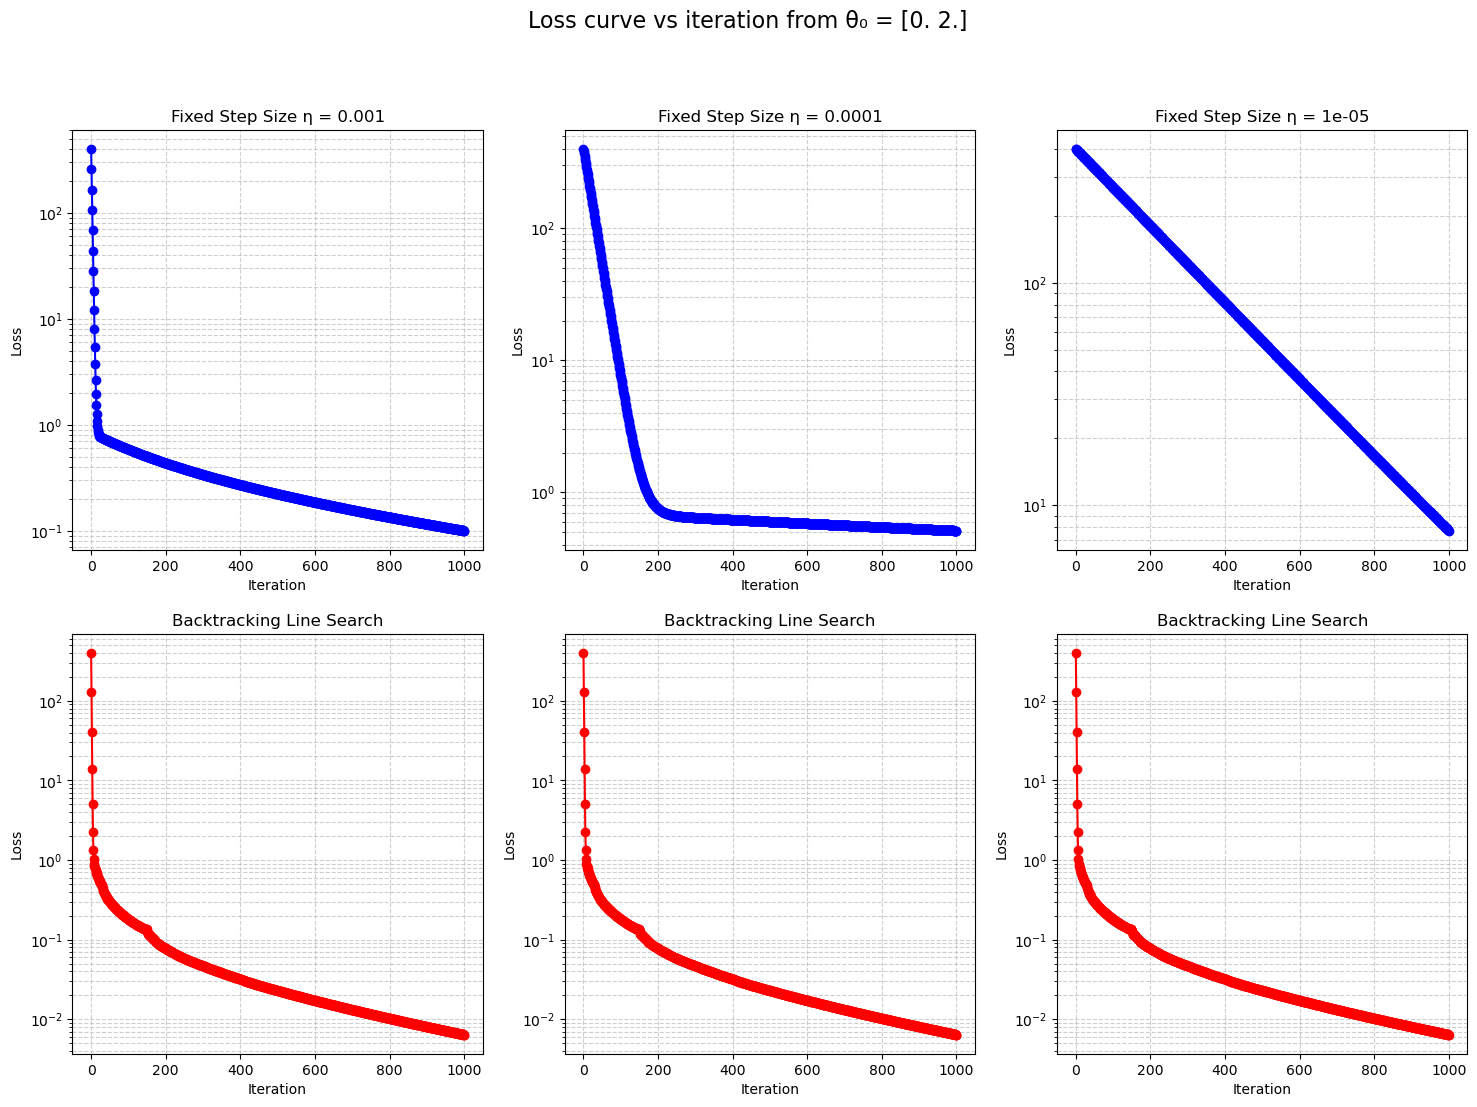

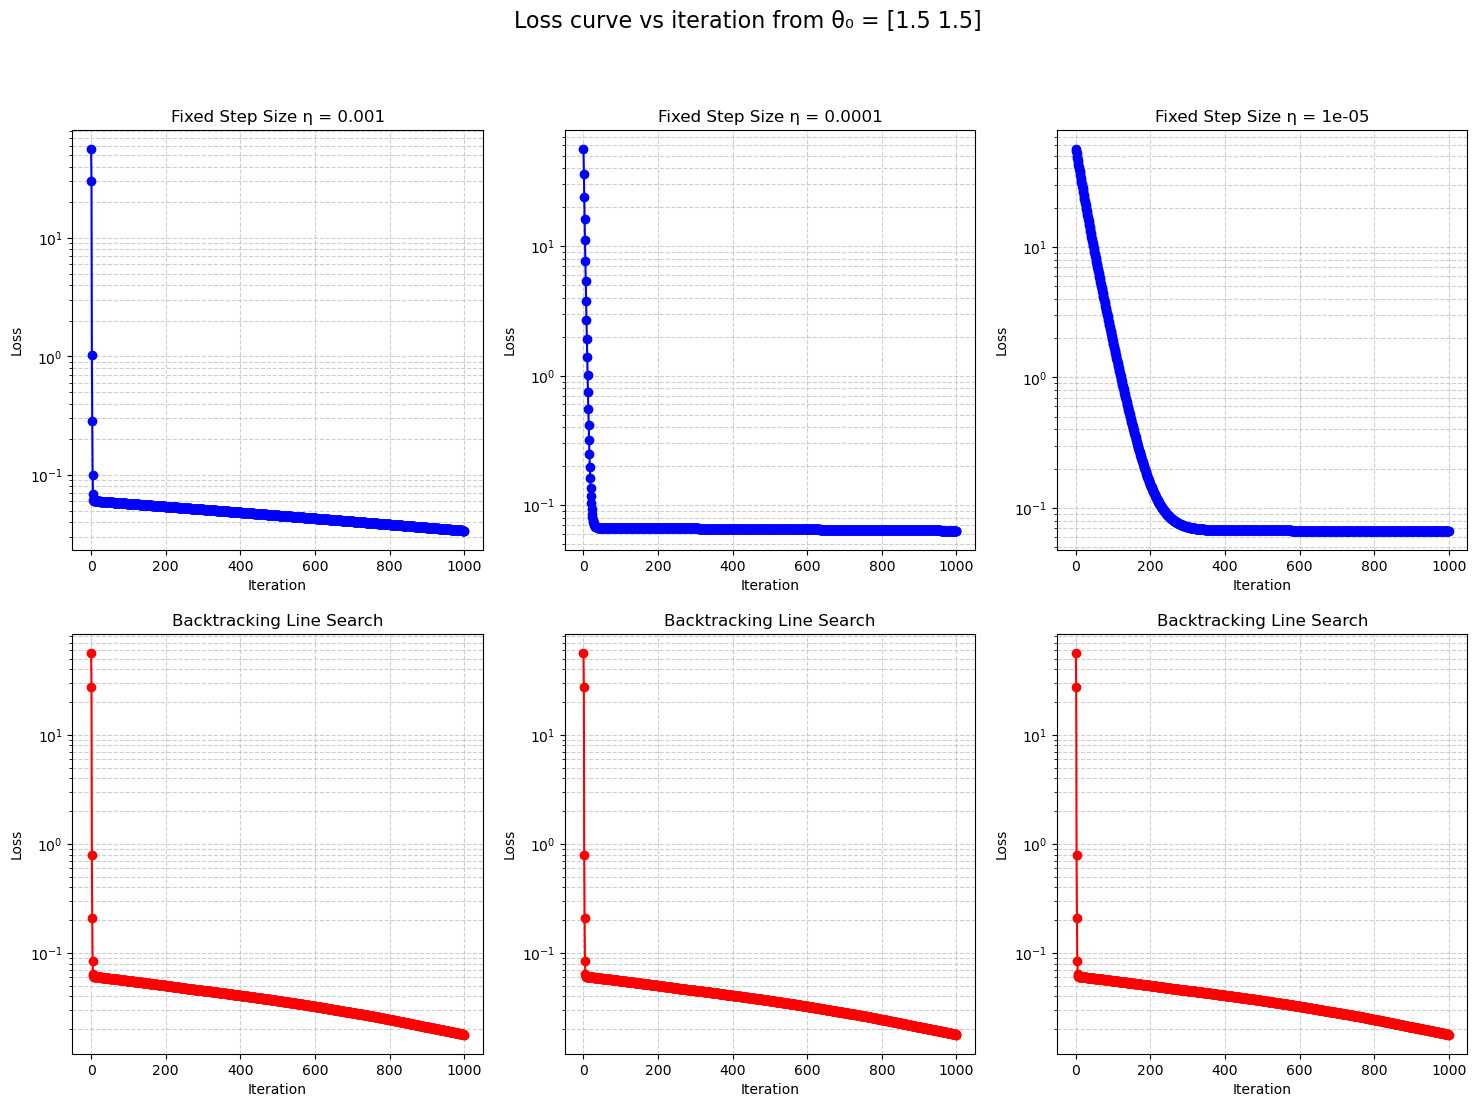

In [60]:
for theta0 in thetaZeros:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Loss curve vs iteration from θ₀ = {theta0}', fontsize=16)
    for idx, eta in enumerate(step_sizes):
        thetas_fixed, losses_fixed = gd_rosenbrock(grad_rosenbrock, theta0, eta, max_iter=1000)
        thetas_bt, losses_bt = gd_rosenbrock_backtracking(grad_rosenbrock, theta0, eta0=1.0, beta=0.5, c=1e-4, tol=1e-6, max_iter=1000)
        
        # Plot loss curve for fixed step size
        ax1 = axes[0, idx]
        plt.sca(ax1)
        ax1.semilogy(np.arange(len(losses_fixed)), losses_fixed, 'b-o')
        ax1.set_title(f'Fixed Step Size η = {eta}')
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Loss')
        ax1.grid(True, which='both', ls='--', alpha=0.6)
        
        # Plot loss curve for backtracking
        ax2 = axes[1, idx]
        plt.sca(ax2)
        ax2.semilogy(np.arange(len(losses_bt)), losses_bt, 'r-o')
        ax2.set_title(f'Backtracking Line Search')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Loss')
        ax2.grid(True, which='both', ls='--', alpha=0.6)